In [1]:
#
# Julia version of code adapted from
# https://github.com/rawlings-group/paresto/blob/master/examples/green_book/batch_data_solution.m
#

In [2]:
using CSV, DataFrames
using JuMP, Ipopt
using Plots
using InfiniteOpt

In [3]:
batch_data = CSV.read("data_sets/batch_data.txt", DataFrame, header = ["t", "c"], delim = ' ', ignorerepeated = true)

,t,c
,Int64,Float64
1,0,0.83
2,4,0.68
3,8,0.59
4,12,0.51
5,16,0.43
6,20,0.38
7,24,0.33
8,28,0.3
9,32,0.26


In [4]:
opt = Ipopt.Optimizer    

Ipopt.Optimizer

In [5]:
texp = batch_data.t
c_exp = Dict(Pair.(batch_data.t, batch_data.c))

Dict{Int64, Float64} with 11 entries:
  16 => 0.43
  20 => 0.38
  12 => 0.51
  24 => 0.33
  28 => 0.3
  8  => 0.59
  40 => 0.21
  0  => 0.83
  4  => 0.68
  32 => 0.26
  36 => 0.24

In [6]:
tlist = unique(sort(vcat(collect(range(0.0, 40.0, length = 100)), texp)))

109-element Vector{Float64}:
  0.0
  0.40404040404040403
  0.8080808080808081
  1.2121212121212122
  1.6161616161616161
  2.0202020202020203
  2.4242424242424243
  2.8282828282828283
  3.2323232323232323
  3.6363636363636362
  4.0
  4.040404040404041
  4.444444444444445
  ⋮
 35.95959595959596
 36.0
 36.36363636363637
 36.76767676767677
 37.17171717171717
 37.57575757575758
 37.97979797979798
 38.38383838383838
 38.78787878787879
 39.19191919191919
 39.5959595959596
 40.0

In [15]:
m = InfiniteModel(opt)

An InfiniteOpt Model
Feasibility problem with:
Finite Parameters: 0
Infinite Parameters: 0
Variables: 0
Derivatives: 0
Measures: 0
Optimizer model backend information: 
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [16]:
@infinite_parameter(m, t in [0, 40.0], supports = tlist)

t

In [17]:
@variable(m, c, Infinite(t))

c(t)

In [18]:
@variable(m, 0.6 <= c0 <= 1.0, start = 0.8)
@variable(m, k >= 0, start = 0.5)
@variable(m, n, start = 1.0)

n

In [19]:
@constraint(m, c(0) == c0)

c(0) - c0 = 0.0

In [20]:
@constraint(m, @deriv(c, t) == -k * (c+1.0e-5)^n)

∂/∂t[c(t)] - -k * (c(t) + 1.0e-5)^n = 0.0, ∀ t ∈ [0, 40]

In [21]:
@objective(m, Min, sum((c(t) - c_exp[t])^2 for t in texp))

c(0)² + c(4)² + c(8)² + c(12)² + c(16)² + c(20)² + c(24)² + c(28)² + c(32)² + c(36)² + c(40)² - 1.66 c(0) - 1.36 c(4) - 1.18 c(8) - 1.02 c(12) - 0.86 c(16) - 0.76 c(20) - 0.66 c(24) - 0.6 c(28) - 0.52 c(32) - 0.48 c(36) - 0.42 c(40) + 2.457

In [22]:
optimize!(m)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      762
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      665

Total number of variables............................:      221
                     variables with only lower bounds:        1
                variables with lower and upper bounds:        1
                     variables with only upper bounds:        0
Total number of equality constraints.................:      218
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.4570000e+00 8.00e-01 1.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [23]:
termination_status(m)

LOCALLY_SOLVED::TerminationStatusCode = 4

In [24]:
value(c0), value(k), value(n)

(0.8259901165405712, 0.05117171907029326, 1.4445753378668418)

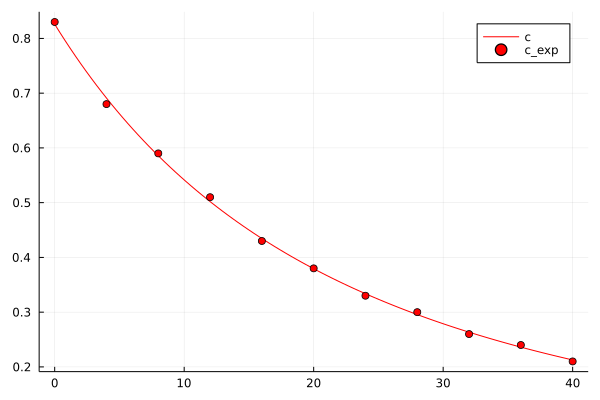

In [26]:
plot(tlist, value(c), label = "c", color = "red")
plot!(texp, [c_exp[t] for t in texp], seriestype = :scatter, label = "c_exp", color = "red")